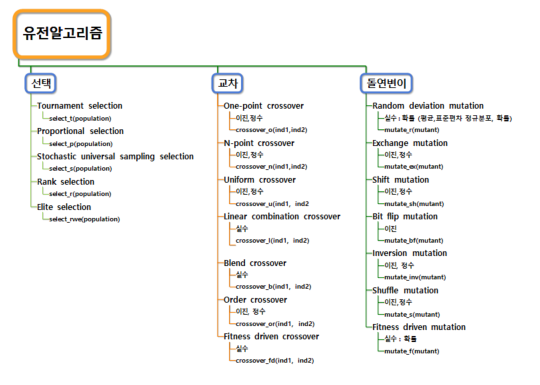

### 함수, 제약조건 1번문제

In [212]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import copy

def constraints(g, min_= 0.3, max_= 5 ):
    if max_ and g > max_:
        g = max_
    if min_ and g < min_:
        g = min_
    return g

def func(x):
    return 0.5* x ** 4 - 4 * x**3 + 10 * x**2 - 7 * x + 2



### 함수, 제약조건 2번문제

In [266]:
# import random
# from typing import List
# import numpy as np
# import matplotlib.pyplot as plt
# import copy

# def constraints(g, min_= -5, max_= 13 ):
#     if max_ and g > max_:
#         g = max_
#     if min_ and g < min_:
#         g = min_
#     return g

# def func(x):
#     return 2*np.sin(x)+0.5*x



### 선택

In [213]:
#토너먼트 선택
def select_tournament(population, size):
    new_offspring = []
    for _ in range(len(population)):
        candidates = [random.choice(population) for _ in range(size)]
        new_offspring.append(min(candidates, key=lambda ind: ind.fitness))
    return new_offspring


In [214]:
# 비례 선택 최대
def select_proportional(population):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = False)
    fitness_sum = sum([ind.fitness for ind in population])
    new_offspring = []

    for _ in range(len(sorted_individuals)):
        shave = (1 - random.random()) * fitness_sum
#         print("shave",shave)
        roulette_sum = 0
        for ind in sorted_individuals:
            roulette_sum += ind.fitness
#             print("룰렛",roulette_sum)
            if roulette_sum > shave:
                new_offspring.append(ind)
                break
#     print('new',new_offspring)
    return new_offspring

In [215]:
print([ind.get_gene() for ind in select_p(population)])

[-7, -8, -9, -8, -10, -9, -10, -8, -6, -10, -8, 6, -9, -10, -9, -6, -10, -7, -9, -7]


In [218]:
#확률적 유니버설 선택
def select_stochastic_universal_sampling(population):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = True)
    fitness_sum = sum([ind.fitness for ind in population])

    distance = fitness_sum / len(population)
    shift = random.uniform(0, distance)
    borders = [shift + i * distance for i in range(len(population))]

    new_offspring = []
    for border in borders:
        i = 0
        roulette_sum = sorted_individuals[i].fitness
        while roulette_sum < border:
            i += 1
            roulette_sum += sorted_individuals[i].fitness
        new_offspring.append(sorted_individuals[i])

    return new_offspring

In [219]:
print([ind.get_gene() for ind in select_s(population)])

[-10, -10, -10, -10, -9, -9, -9, -9, -9, -9, -8, -8, -8, -8, -7, -6, -6, -6, -6, 6]


In [220]:
#순위 선택
def select_rank(population):
    sorted_individuals = sorted(population, key=lambda ind: ind.fitness, reverse=False)
    rank_distance = 1 / len(population)
    ranks = [(1 - i * rank_distance) for i in range(len(population))]
    ranks_sum = sum(ranks)
    new_offspring = []

    for _ in range(len(sorted_individuals)):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                new_offspring.append(sorted_individuals[i])
                break

    return new_offspring



In [221]:
print([ind.get_gene() for ind in select_r(population)])

[-6, 2, 6, -2, -6, -2, 2, 6, 1, 2, 9, -2, 2, -8, 2, -6, -4, 6, -4, -3]


In [222]:
#앨리트 순위 선택
def select_rank_with_elite(population, elite_size = 0):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = False)
    rank_distance = 1 / len(population)
    ranks = [(1 - i * rank_distance) for i in range(len(population))]
    ranks_sum = sum(ranks)
    new_offspring = sorted_individuals[0:elite_size]

    for i in range(len(sorted_individuals) - elite_size):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                new_offspring.append(sorted_individuals[i])
                break

    return new_offspring

In [223]:
print([ind.get_gene() for ind in select_rwe(population)])

[1, 2, -6, 9, 2, -4, 6, -7, 2, 6, -8, 1, 9, -6, -3, 1, -6, 2, 6, -6]


### 선택 호출

In [224]:
#토너먼트 선택
def select_t(population):
    return select_tournament(population, size=3)
print([ind.get_gene() for ind in select_t(population)])

[-6, 2, 2, 1, 6, -6, 9, 6, 2, 1, -6, -6, 2, 6, -4, 6, 2, 2, -2, 2]


In [225]:
#비례 선택
def select_p(population):
    return select_proportional(population)
print([ind.get_gene() for ind in select_p(population)])

[-4, -9, -9, -9, -8, -7, -8, -6, -7, -8, -9, -8, -9, -7, -9, -6, -8, -10, -6, -9]


In [226]:
#확률적 유니버셜 선택
def select_s(population):
    return select_stochastic_universal_sampling(population)
print([ind.get_gene() for ind in select_s(population)])

[-10, -10, -10, -10, -9, -9, -9, -9, -9, -9, -8, -8, -8, -8, -7, -7, -6, -6, -6, 9]


In [227]:
#순위 선택
def select_r(population):
    return select_rank(population)
print([ind.get_gene() for ind in select_r(population)])

[-2, 6, -6, -7, 6, 6, 6, 2, -6, 6, 1, 2, -2, -6, 2, 2, -7, -2, -8, 1]


In [228]:
#앨리트 순위 선택
def select_rwe(population):
    
    return select_rank_with_elite(population, 2)
print([ind.get_gene() for ind in select_rwe(population)])

[1, 2, 1, 2, 6, 6, -2, -8, -8, -3, -9, -6, -9, -3, 2, -3, 1, 6, -9, 6]


### 교차

In [229]:
def crossover_one_point(p1, p2):
    point = random.randint(1, len(p1) - 1)
    c1, c2 = copy.deepcopy(p1), copy.deepcopy(p2)
    c1[point:], c2[point:] = p2[point:], p1[point:]
    return [c1, c2]

In [230]:
def crossover_n_point(p1, p2, n):
    ps = random.sample(range(1, len(p1) - 1), n)
    ps.append(0)
    ps.append(len(p1))
    ps = sorted(ps)
    c1, c2 = copy.deepcopy(p1), copy.deepcopy(p2)
    for i in range(0, n + 1):
        if i % 2 == 0:
            continue
        c1[ps[i]:ps[i + 1]] = p2[ps[i]:ps[i + 1]]
        c2[ps[i]:ps[i + 1]] = p1[ps[i]:ps[i + 1]]
    return [c1, c2]

In [231]:
def crossover_uniform(p1, p2, prop):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)

    for i in range(len(p1)):
        if random.random() < prop:
            c1[i], c2[i] = p2[i], p1[i]

    return [c1, c2]

In [232]:
def crossover_order(p1, p2):
    zero_shift = min(p1)
    length = len(p1)
    start, end = sorted([random.randrange(length) for _ in range(2)])
    c1, c2 = [nan] * length, [nan] * length
    t1, t2 = [x - zero_shift for x in p1], [x - zero_shift for x in p2]

    spaces1, spaces2 = [True] * length, [True] * length
    for i in range(length):
        if i < start or i > end:
            spaces1[t2[i]] = False
            spaces2[t1[i]] = False

    j1, j2 = end + 1, end + 1
    for i in range(length):
        if not spaces1[t1[(end + i + 1) % length]]:
            c1[j1 % length] = t1[(end + i + 1) % length]
            j1 += 1

        if not spaces2[t2[(i + end + 1) % length]]:
            c2[j2 % length] = t2[(i + end + 1) % length]
            j2 += 1

    for i in range(start, end + 1):
        c1[i], c2[i] = t2[i], t1[i]

    return [[x + zero_shift for x in c1], [x + zero_shift for x in c2]]

# crossover_order(p1, p2)

### 교차 호출

In [233]:
def crossover_o(parent1, parent2):
    child1_gene, child2_gene = crossover_one_point(p1, p2)
    return Individual([child1_gene]), Individual([child2_gene])

In [234]:
def crossover_n(parent1, parent2):
    child1_gene, child2_gene = crossover_n_point(p1, p2, 3)
    return Individual([child1_gene]), Individual([child2_gene])

In [235]:
def crossover_u(ind1, ind2):
    return crossover_uniform(p1, p2, 0.5)

In [236]:
def crossover_or(ind1, ind2):
    return crossover_order(p1, p2)

### 돌연변이

In [237]:
def mutation_exchange(ind):
    mut = copy.deepcopy(ind)
    pos = random.sample(range(0, len(mut)), 2)
    g1 = mut[pos[0]]
    g2 = mut[pos[1]]
    mut[pos[1]] = g1
    mut[pos[0]] = g2
    return mut

# mutation_exchange(ind)

In [238]:
def mutation_bit_flip(ind):
    mut = copy.deepcopy(ind)
    pos = random.randint(0, len(ind) - 1)
    g1 = mut[pos]
    mut[pos] = (g1 + 1) % 2
    return mut
# mutation_bit_flip(mutant)

In [239]:
def mutation_inversion(ind):
    mut = copy.deepcopy(ind)
    temp = copy.deepcopy(ind)
    pos = sorted(random.sample(range(0, len(mut)), 2))
    for i in range(0, (pos[1] - pos[0]) + 1):
        mut[pos[0] + i] = temp[pos[1] - i]

    return mut

# mutation_inversion(mutant)

In [240]:
def mutation_shuffle(ind):
    mut = copy.deepcopy(ind)
    pos = sorted(random.sample(range(0, len(mut)), 2))
    subrange = mut[pos[0]:pos[1] + 1]
    random.shuffle(subrange)
    mut[pos[0]:pos[1] + 1] = subrange

    return mut

# mutation_shuffle(mutant)

In [241]:
def mutation_shift(ind):
    mut = copy.deepcopy(ind)
    pos = random.sample(range(0, len(mut)), 2)
    g1 = mut[pos[0]]
    dir = int(copysign(1, pos[1] - pos[0]))
    for i in range(pos[0], pos[1], dir):
        mut[i] = mut[i + dir]
    mut[pos[1]] = g1
    return mut

# mutation_shift(ind)

### 돌연변이 호출

In [259]:
def mutate_ex(mutant):
    mutated_gene = mutation_exchange(ind)
    return mutated_gene

In [260]:
def mutate_bf(mutant):
    mutated_gene = mutation_bit_flip(ind)
    return mutated_gene

In [261]:
def mutate_inv(mutant):
    mutated_gene = mutation_inversion(ind)
    return mutated_gene

In [262]:
def mutate_s(mutant):
    mutated_gene = mutation_shuffle(ind)
    return mutated_gene

In [263]:
def mutate_sh(mutant):
    mutated_gene = mutation_shift(ind)
    return mutated_gene

### 좋은 개체 찾기

In [258]:
def get_best(population):
    best = population[0]
    for ind in population:
        if ind.fitness < best.fitness:
            best = ind
    return best

### 그래프

In [257]:
def plot_population(population, number_of_population):
    best = get_best(population)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, func(x), '--', color='blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color='orange'
    )
    plt.plot([best.get_gene()], [best.fitness], 's', color='green')
    plt.title(f"Generation number {number_of_population}")
    plt.ylim(-3, 6)
    plt.show()
    plt.close()

### 초기해 생성 (정수,이진 초기해 생성 과정 필요)

In [255]:
class Individual:
    def __init__(self, gene_list: List[float]) -> None:
        self.gene_list = gene_list
        self.fitness = func(self.gene_list[0])

    def get_gene(self):
        return self.gene_list[0]

In [256]:
def create_random():
    return Individual([random.randint(-10, 10)])

### 제약조건

In [254]:
random.seed(52)
POPULATION_SIZE = 20
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.1
MAX_GENERATIONS = 10

### 초기해

In [253]:
def plot_population(population, number_of_population):
    best = get_best(population)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, func(x), '--', color='blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color='orange'
    )
    plt.plot([best.get_gene()], [best.fitness], 's', color='green')
    plt.title(f"Generation number {number_of_population}")
    plt.ylim(-1, 6)
    plt.show()
    plt.close()

# 코드 최종 (이진 인코딩 및 crossover 오류 해결 필요)

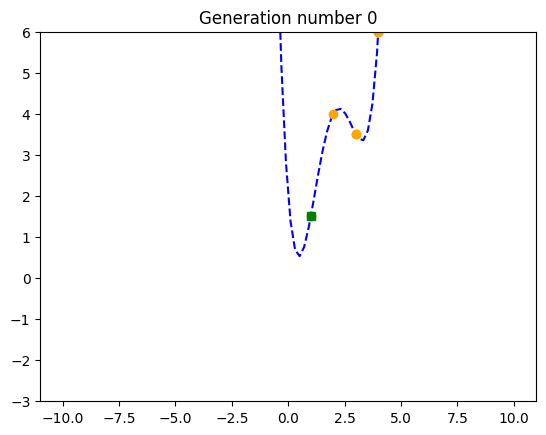

NameError: name 'p1' is not defined

In [265]:
import itertools

selection_methods = [select_t, select_p, select_s, select_r, select_rwe]
crossover_methods = [crossover_o, crossover_n, crossover_u, crossover_or]
mutation_methods = [mutate_r,mutate_ex,mutate_sh,mutate_bf,mutate_inv,mutate_s]

combinations = list(itertools.product(selection_methods, crossover_methods, mutation_methods))

first_population = [create_random() for _ in range(POPULATION_SIZE)]
generation_number = 0
population = first_population.copy()

plot_population(first_population, 0)  # 0세대

while generation_number < MAX_GENERATIONS:
    generation_number += 1

    for combination in combinations:
        # SELECTION
        selection_method = combination[0]
        offspring = selection_method(population)

        # CROSSOVER
        crossover_method = combination[1]
        crossed_offspring = []
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CROSSOVER_PROBABILITY:
                kid1, kid2 = crossover_method(ind1, ind2)
                crossed_offspring.append(kid1)
                crossed_offspring.append(kid2)
            else:
                crossed_offspring.append(ind1)
                crossed_offspring.append(ind2)

        # MUTATION
        mutation_method = combination[2]
        mutated_offspring = []
        for mutant in crossed_offspring:
            if random.random() < MUTATION_PROBABILITY:
                new_mutant = mutation_method(mutant)
                mutated_offspring.append(new_mutant)
            else:
                mutated_offspring.append(mutant)

        population = mutated_offspring.copy()
        plot_population(population, generation_number)

        best = get_best(population)
        print("Selection Method:", selection_method.__name__)
        print("Crossover Method:", crossover_method.__name__)
        print("Mutation Method:", mutation_method.__name__)
        print("Minimum X:", best.get_gene())
        print("Fitness:", best.fitness)
        print("---")
